# Food Delivery Time Prediction

## Week Two Project Two

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Dataset

In [2]:
dataset = pd.read_csv("deliverytime.txt")

In [3]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
dataset.shape


(45593, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
dataset.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

### Calculating the Distance betweeen Two Latitudes and Longitudes Using Haversine formula

In [7]:
from math import radians, cos, sin, asin, sqrt

In [8]:
def dist_cal(lat1,lon1,lat2,lon2):
    
    lat1=radians(lat1)
    lon1=radians(lon1) 
    lat2=radians(lat2)
    lon2=radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r=6371
    return(c * r)


for i in range(len(dataset)):
    dataset.loc[i, 'Distance'] = dist_cal(dataset.loc[i, 'Restaurant_latitude'], 
                                        dataset.loc[i, 'Restaurant_longitude'], 
                                        dataset.loc[i, 'Delivery_location_latitude'], 
                                        dataset.loc[i, 'Delivery_location_longitude']) 

In [9]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


### Exploring the Data Using Matplotlib

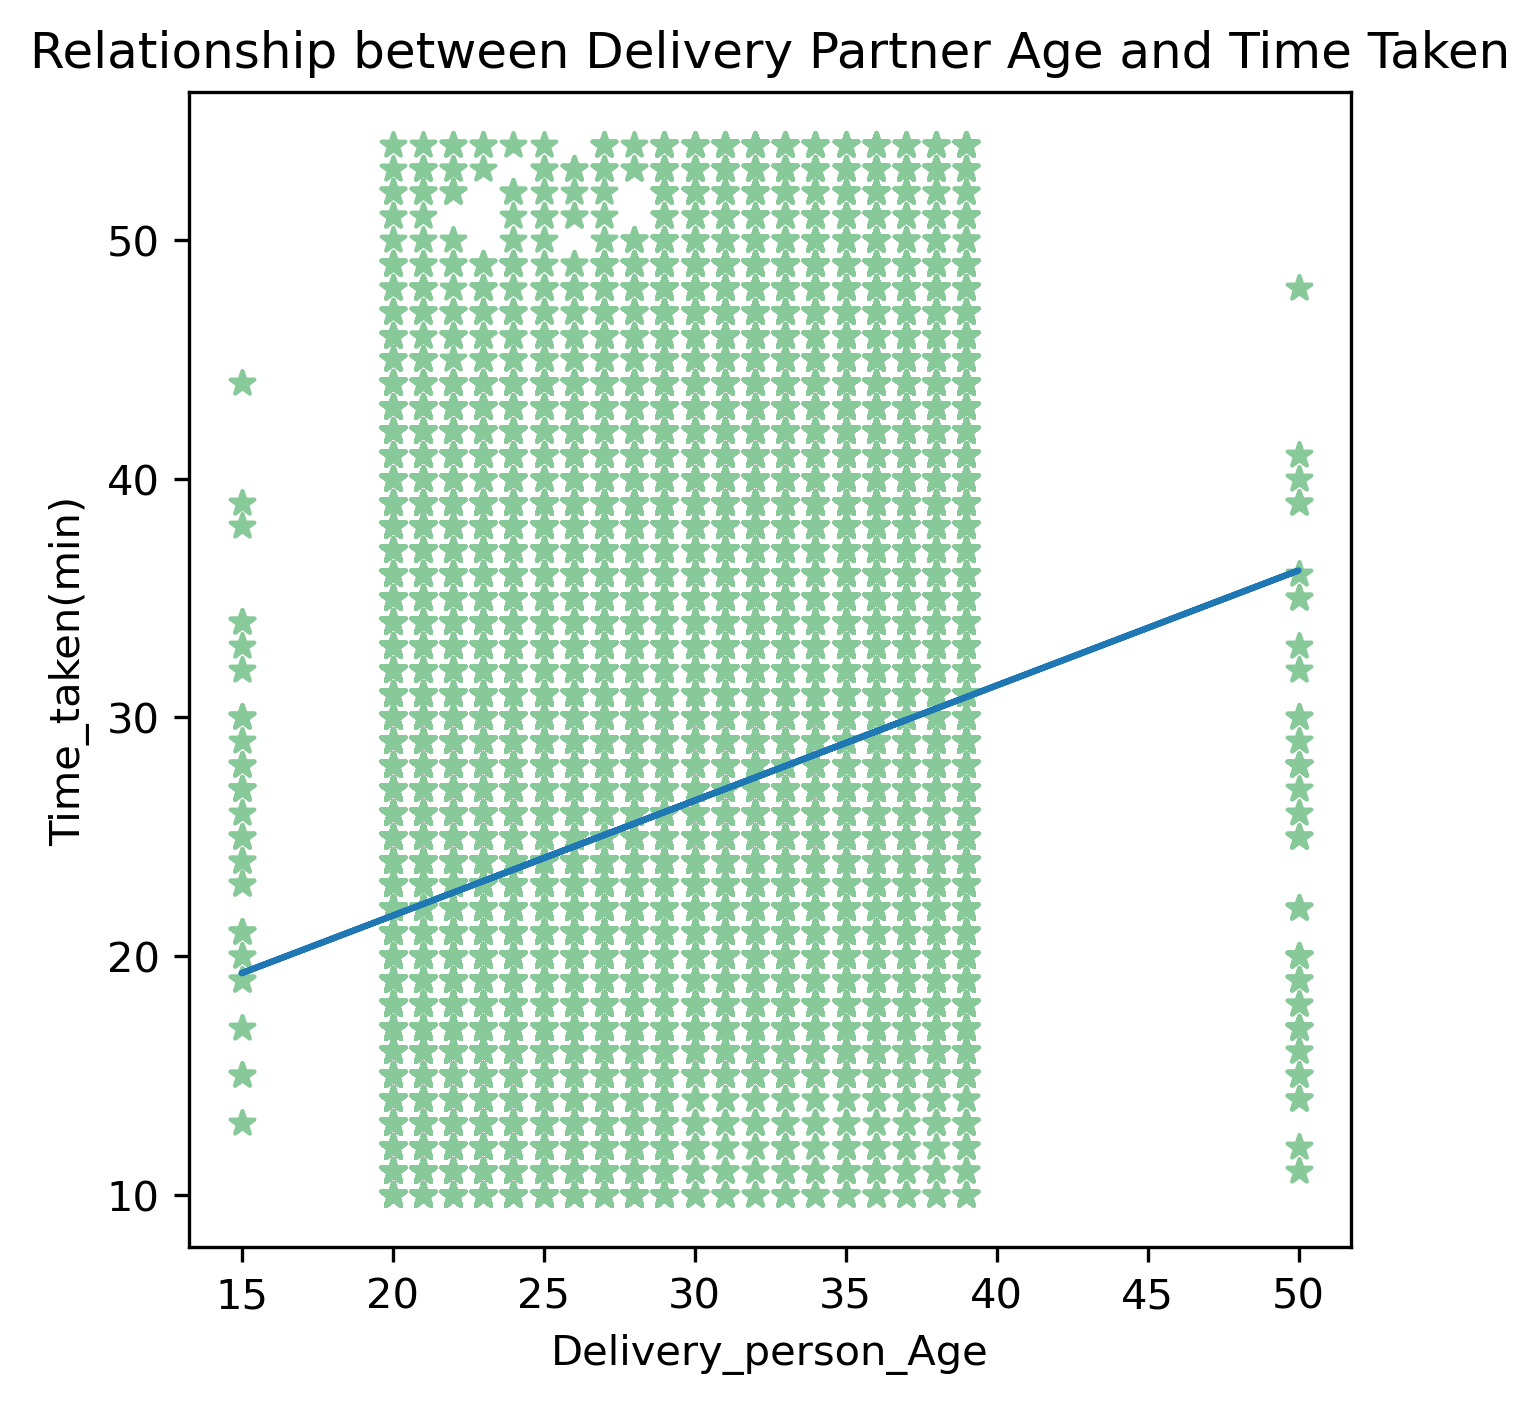

In [10]:
plt.figure(figsize=(5,5),dpi=300)
x=dataset['Delivery_person_Age']
y=dataset['Time_taken(min)']
plt.scatter(x,y, color = '#88c999',marker="*")
plt.xlabel("Delivery_person_Age")
plt.ylabel("Time_taken(min)")
plt.title("Relationship between Delivery Partner Age and Time Taken")



z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

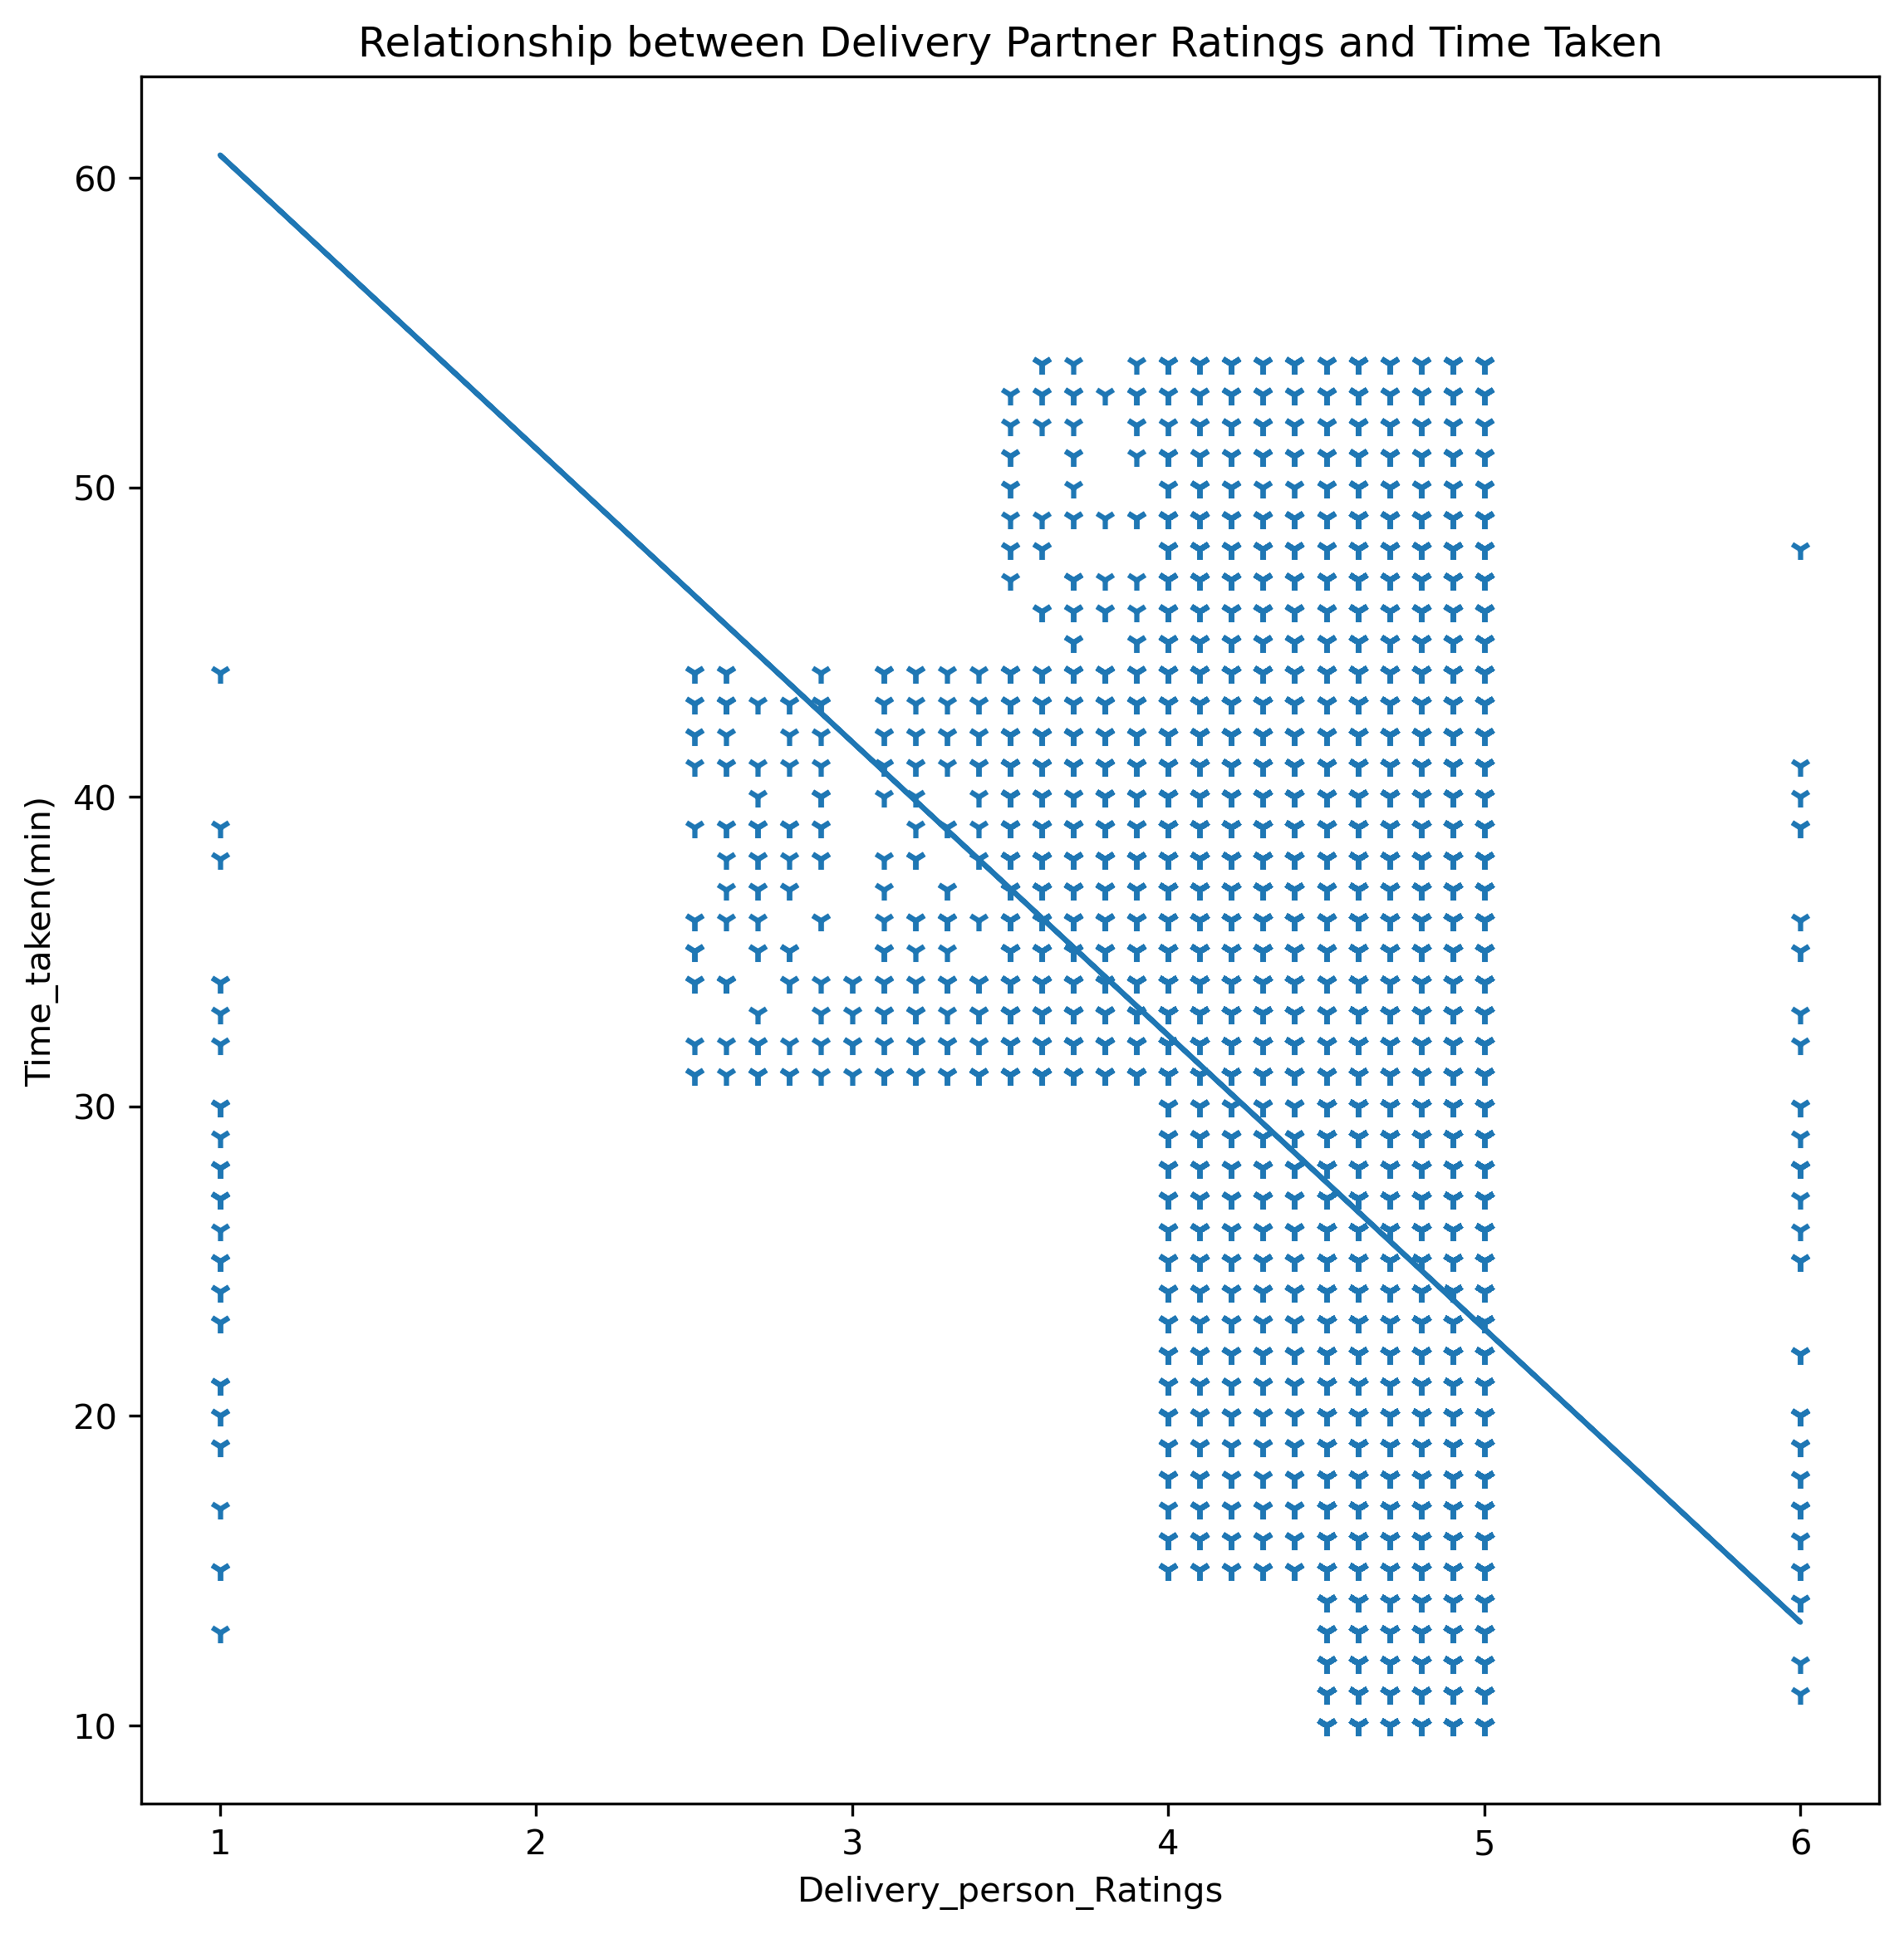

In [12]:
plt.figure(figsize=(9,9),dpi=300)
x=dataset['Delivery_person_Ratings']
y=dataset['Time_taken(min)']
colors = np.array([1,2,3,4,5])
plt.scatter(x,y,marker="1")
plt.xlabel("Delivery_person_Ratings")
plt.ylabel("Time_taken(min)")
plt.title("Relationship between Delivery Partner Ratings and Time Taken")


z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

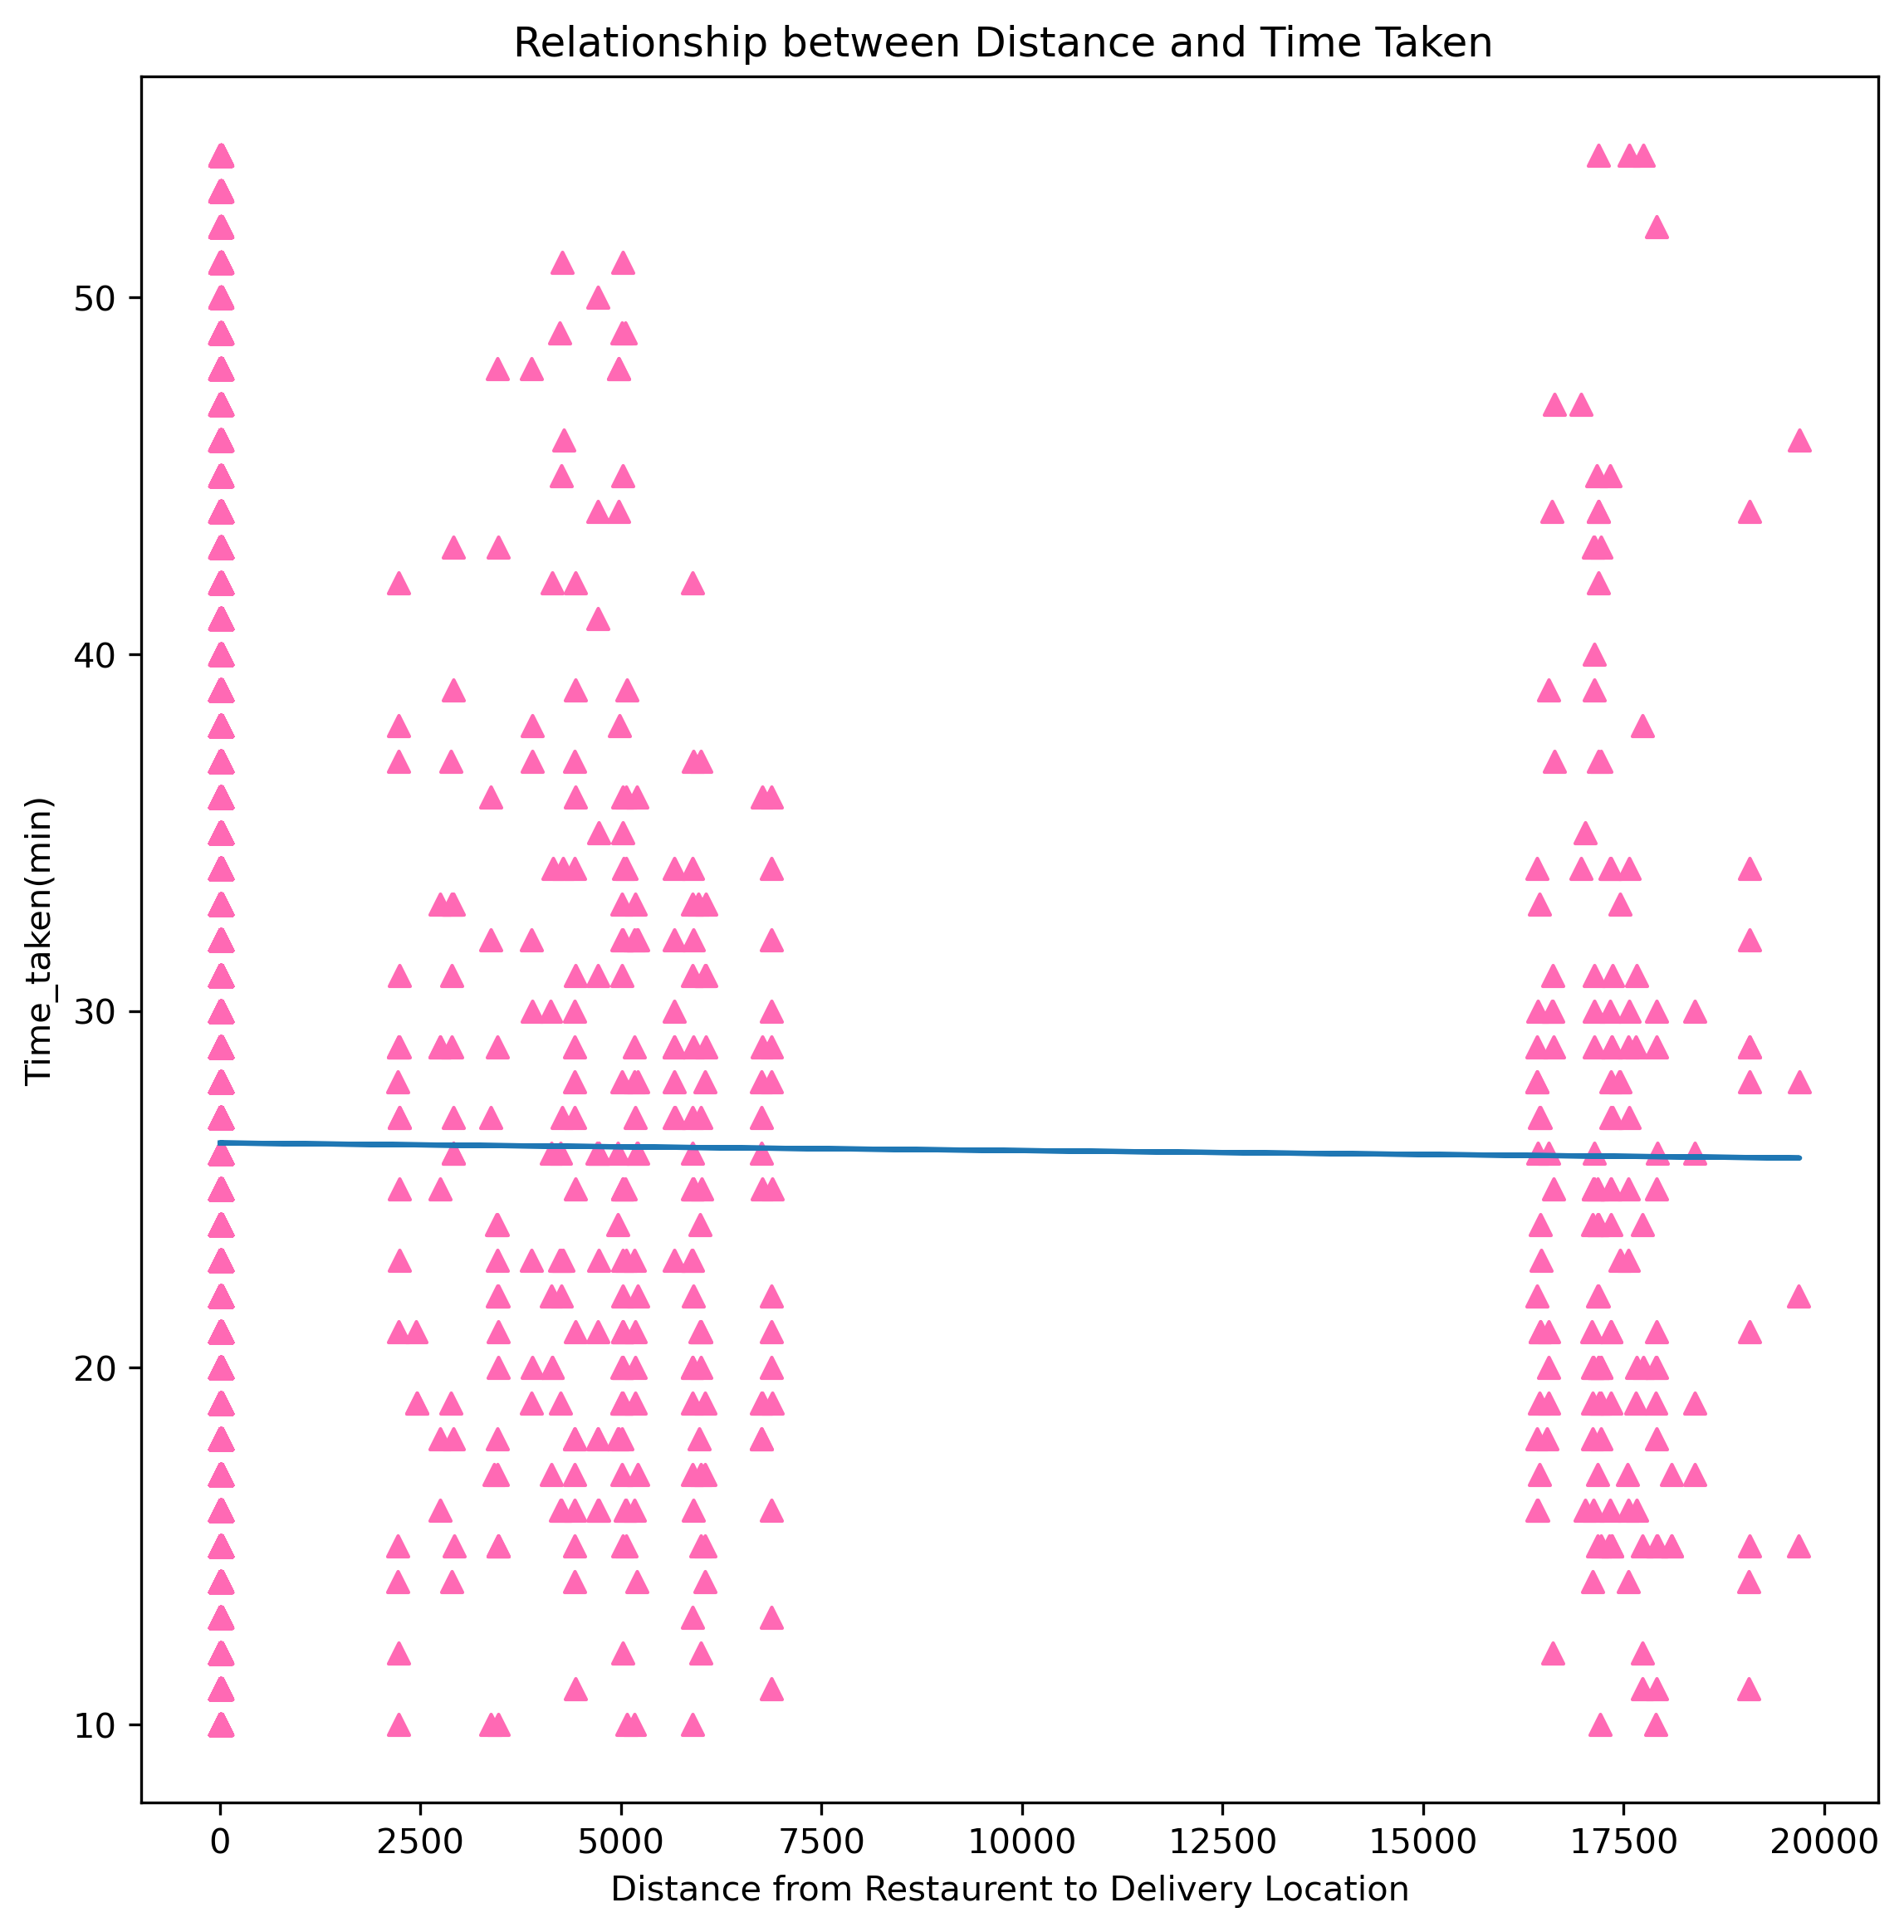

In [29]:
plt.figure(figsize=(9,9),dpi=300)
x=dataset['Distance']
y=dataset['Time_taken(min)']
plt.scatter(x,y,color = 'hotpink',marker="^")
plt.xlabel("Distance from Restaurent to Delivery Location")
plt.ylabel("Time_taken(min)")
plt.title("Relationship between Distance and Time Taken ")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x))

### Using the feautures

1-"age of the delivery partner"

2-"ratings of the delivery partner"

3-"distance between the restaurant and the delivery location"

That contribute more to the Delivery time, Let's predict Delivery Time for our input


In [14]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Food Delivery Time Prediction Model Using Sklearn,Keras,Tensorflow

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [15]:
from sklearn.model_selection import train_test_split
x = np.array(dataset[["Delivery_person_Age", 
                   "Delivery_person_Ratings", 
                   "Distance"]])
y = np.array(dataset[["Time_taken(min)"]])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.15, random_state=50)

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
38754/38754 [==============================] - 199s 5ms/step - loss: 70.3584
Epoch 2/9
38754/38754 [==============================] - 196s 5ms/step - loss: 63.5416
Epoch 3/9
38754/38754 [==============================] - 211s 5ms/step - loss: 61.2916
Epoch 4/9
38754/38754 [==============================] - 197s 5ms/step - loss: 60.3270
Epoch 5/9
38754/38754 [==============================] - 202s 5ms/step - loss: 60.0479
Epoch 6/9
38754/38754 [==============================] - 188s 5ms/step - loss: 59.8902
Epoch 7/9
38754/38754 [==============================] - 191s 5ms/step - loss: 59.5017
Epoch 8/9
38754/38754 [==============================] - 210s 5ms/step - loss: 59.0108
Epoch 9/9
38754/38754 [==============================] - 201s 5ms/step - loss: 59.1098


In [18]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries(1-5): "))
c = int(input("Total Distance in (KM): "))

features = np.array([[a, b, c]])
print("Predicted Delivery time in Minutes= ",model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 25
Ratings of Previous Deliveries(1-5): 4
Total Distance in (KM): 25
1/1 [==============================] - 0s 24ms/step
Predicted Delivery time in Minutes=  [[37.430412]]
